# Análise Exploratória das Emendas PIX

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

## Carregamento dos Dados

In [2]:
df = pd.read_csv('../data/Emendas-Parlamentares-especiais.csv')
print('Formato:', df.shape)
df.head()

Formato: (37793, 18)


,Nome Ente,UF,Código Siafi,Código IBGE,Data,Ano,Mês,Tipo Ente,OB,CNPJ do Favorecido,Nome Favorecido,Nome Emenda,Transferência Especial,Categoria Econômica Despesa,Valor,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Abadia de Goiás,GO,1050.0,5200050.0,44440.0,2021.0,setembro,Município,170860000012021OB802970,1.613940e+12,MUNICIPIO DE ABADIA DE GOIAS,Emenda Individual,Sim,DESPESAS DE CAPITAL,250000.0,NaN,NaN,NaN
1,Abadia de Goiás,GO,1050.0,5200050.0,44743.0,2022.0,julho,Município,170860000012022OB802457,1.613940e+12,MUNICIPIO DE ABADIA DE GOIAS,Emenda Individual,Sim,DESPESAS CORRENTES,130000.0,NaN,NaN,NaN
2,Abadia de Goiás,GO,1050.0,5200050.0,45139.0,2023.0,agosto,Município,170860000012023OB805663,1.613940e+12,MUNICIPIO DE ABADIA DE GOIAS,Emenda Individual,Sim,DESPESAS CORRENTES,150000.0,NaN,NaN,NaN
3,Abadia de Goiás,GO,1050.0,5200050.0,45139.0,2023.0,agosto,Município,170860000012023OB805664,1.613940e+12,MUNICIPIO DE ABADIA DE GOIAS,Emenda Individual,Sim,DESPESAS DE CAPITAL,500000.0,NaN,NaN,NaN
4,Abadia de Goiás,GO,1050.0,5200050.0,45261.0,2023.0,dezembro,Município,170860000012023OB815823,1.613940e+12,MUNICIPIO DE ABADIA DE GOIAS,Emenda Individual,Sim,DESPESAS DE CAPITAL,700000.0,NaN,NaN,NaN


## Informações Básicas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37793 entries, 0 to 37792
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nome Ente                    37792 non-null  object 
 1   UF                           37792 non-null  object 
 2   Código Siafi                 37792 non-null  float64
 3   Código IBGE                  37792 non-null  float64
 4   Data                         37792 non-null  float64
 5   Ano                          37792 non-null  float64
 6   Mês                          37792 non-null  object 
 7   Tipo Ente                    37792 non-null  object 
 8   OB                           37792 non-null  object 
 9   CNPJ do Favorecido           37792 non-null  float64
 10  Nome Favorecido              37792 non-null  object 
 11  Nome Emenda                  37792 non-null  object 
 12  Transferência Especial       37792 non-null  object 
 13  Categoria Econôm

## Limpeza de Dados

In [4]:
cols_drop = [c for c in df.columns if c.startswith('Unnamed')]
print('Removendo colunas:', cols_drop)
df = df.drop(columns=cols_drop)

Removendo colunas: ['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17']


## Estatísticas Descritivas

In [5]:
df['Valor'].describe()

count    3.779200e+04
mean     5.029988e+05
std      7.506571e+05
min      5.000000e-01
25%      1.500000e+05
50%      3.000000e+05
75%      5.000000e+05
max      1.724191e+07
Name: Valor, dtype: float64

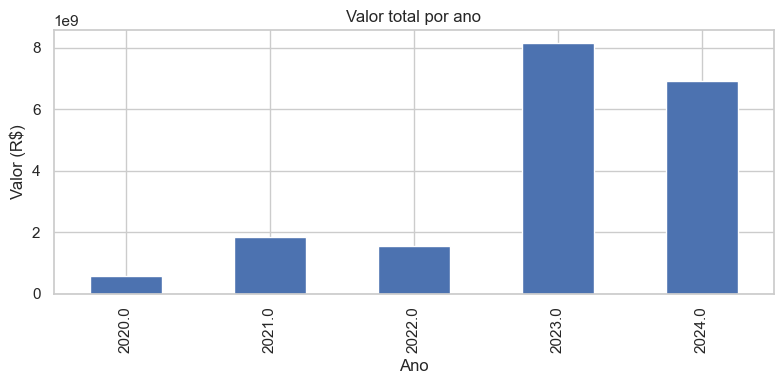

In [6]:
df.groupby('Ano')['Valor'].sum().plot(kind='bar', figsize=(8,4), title='Valor total por ano')
plt.ylabel('Valor (R$)')
plt.tight_layout()
plt.show()

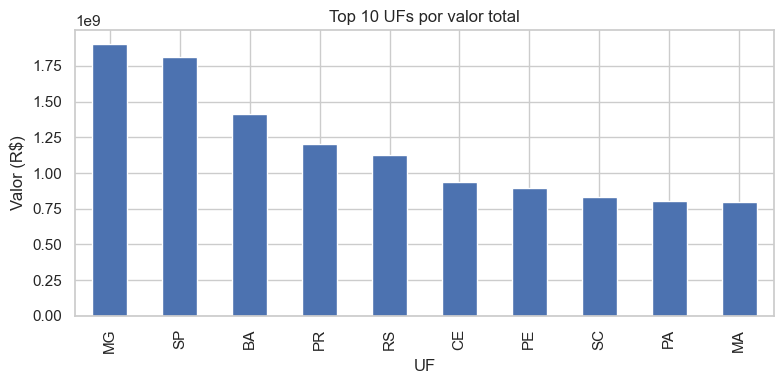

In [7]:
top_ufs = df.groupby('UF')['Valor'].sum().sort_values(ascending=False).head(10)
top_ufs.plot(kind='bar', figsize=(8,4), title='Top 10 UFs por valor total')
plt.ylabel('Valor (R$)')
plt.tight_layout()
plt.show()